In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from mpl_toolkits.mplot3d import Axes3D

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("network-intrusion-detection/Train_data.csv")

In [144]:
data_anomaly = train[train['class'] == 'normal']

In [156]:
data_anomaly

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0             0           tcp  ftp_data   SF        491          0     0   
1             0           udp     other   SF        146          0     0   
3             0           tcp      http   SF        232       8153     0   
4             0           tcp      http   SF        199        420     0   
12            0           tcp      http   SF        287       2251     0   
16            0           tcp      http   SF        300      13788     0   
18            0           tcp      http   SF        233        616     0   
19            0           tcp      http   SF        343       1178     0   
22            0           tcp      http   SF        253      11905     0   
23         5607           udp     other   SF        147        105     0   
25          507           tcp    telnet   SF        437      14421     0   
27            0           tcp      http   SF        227       6588     0   
28            0           tcp      http   SF        215      10499     0   
29            0           tcp      http   SF        241       1400     0   
32            0           tcp      http   SF        303        555     0   
34            0           udp  domain_u   SF         45         45     0   
35            1           udp   private   SF        105        147     0   
36            0           udp  domain_u   SF         43         43     0   
38            0           tcp      http   SF        324       2302     0   
42            2           tcp      smtp   SF       1591        372     0   
43         9052           udp     other   SF        146        105     0   
44            0           tcp      http   SF        290       3006     0   
47            0           tcp      http   SF        255        861     0   
50            0           tcp      http   SF        302        498     0   
53            0           tcp      http   SF        220       1398     0   
54            0           udp  domain_u   SF         43         69     0   
55            0           udp  domain_u   SF         44        133     0   
59            0           udp  domain_u   SF         43         43     0   
60            0           tcp  ftp_data   SF        641          0     0   
63            0           tcp      http   SF        310       2794     0   
...         ...           ...       ...  ...        ...        ...   ...   
25136         0           tcp      http   SF        296        655     0   
25140         0           tcp  ftp_data   SF       7422          0     0   
25142         0           tcp      http   SF        300       1466     0   
25144        28           tcp       ftp   SF        861       2586     0   
25145         0          icmp     urp_i   SF        183          0     0   
25146         0           udp  domain_u   SF         45         93     0   
25148       322           tcp    telnet   SF        248       8082     0   
25149         0           tcp      http   SF        342        327     0   
25150         0           tcp  ftp_data   SF       5891          0     0   
25152         0           tcp      http   SF        307       8792     0   
25153         0           tcp      http   SF        253       2365     0   
25154         0           tcp      http   SF        222       1337     0   
25155        27           tcp       ftp   SF       1483       4152     0   
25156         0           tcp      http   SF        282        312     0   
25157         0           tcp      http   SF        192       1490     0   
25159         0           tcp      http   SF        299        392     0   
25161         0           tcp      http   SF        215        293     0   
25162         0           udp   private   SF        105        147     0   
25164         0           tcp      http   SF        276        622     0   
25165         0           tcp      http   SF       2499       2737     0   
25167         0           tcp      http   SF        193

In [152]:
df = data_anomaly.src_bytes.mean()
print(df)

11394.4136367


In [157]:
data_anomaly1 = train[train['class'] == 'anomaly']
data_anomaly1

duration protocol_type     service  flag  src_bytes  dst_bytes  land  \
2             0           tcp     private    S0          0          0     0   
5             0           tcp     private   REJ          0          0     0   
6             0           tcp     private    S0          0          0     0   
7             0           tcp     private    S0          0          0     0   
8             0           tcp  remote_job    S0          0          0     0   
9             0           tcp     private    S0          0          0     0   
10            0           tcp     private   REJ          0          0     0   
11            0           tcp     private    S0          0          0     0   
13            0           tcp    ftp_data    SF        334          0     0   
14            0           tcp        name    S0          0          0     0   
15            0           tcp  netbios_ns    S0          0          0     0   
17            0          icmp       eco_i    SF         18          0     0   
20            0           tcp         mtp    S0          0          0     0   
21            0           tcp     private    S0          0          0     0   
24            0           tcp         mtp    S0          0          0     0   
26            0           tcp     private    S0          0          0     0   
30            0          icmp       eco_i    SF          8          0     0   
31            0           tcp      finger    S0          0          0     0   
33            0           tcp     private   REJ          0          0     0   
37            0           tcp      supdup    S0          0          0     0   
39            0           tcp   uucp_path    S0          0          0     0   
40            0           tcp    ftp_data    S0          0          0     0   
41            0           tcp      Z39_50    S0          0          0     0   
45            0           tcp    csnet_ns    S0          0          0     0   
46            0           udp     private    SF         28          0     0   
48            0           tcp    ftp_data    SF        334          0     0   
49            0           tcp    ftp_data    S0          0          0     0   
51            0           tcp     private   REJ          0          0     0   
52            0           udp     private    SF         28          0     0   
56            0          icmp       eco_i    SF          8          0     0   
...         ...           ...         ...   ...        ...        ...   ...   
25124         0           tcp         mtp    S0          0          0     0   
25126         0           tcp      telnet    S0          0          0     0   
25127         0           tcp      finger    S0          0          0     0   
25130         0          icmp       eco_i    SF          8          0     0   
25137         0           tcp         ftp    S0          0          0     0   
25138         0           tcp     private    S0          0          0     0   
25139         0           tcp        name  RSTR          0          0     0   
25141         0           tcp   uucp_path    S0          0          0     0   
25143         0           tcp     private    S0          0          0     0   
25147         0           tcp      finger    S0          0          0     0   
25151         0           tcp         ssh    S0          0          0     0   
25158         0           udp     private    SF         28          0     0   
25160         0           tcp         ftp    S0          0          0     0   
25163         0           tcp        smtp    S0          0          0     0   
25166         0           tcp         ctf   REJ          0          0     0   
25170         0           tcp        smtp    S0          0          0     0   
25171         0           tcp     private    S0          0          0     0   
25172         0           tcp      telnet    S0          0          0     0   
25174         0           tcp         ftp  RSTO          

In [154]:
df1 = data_anomaly1.src_bytes.mean()
print(df1)

39146.1906668


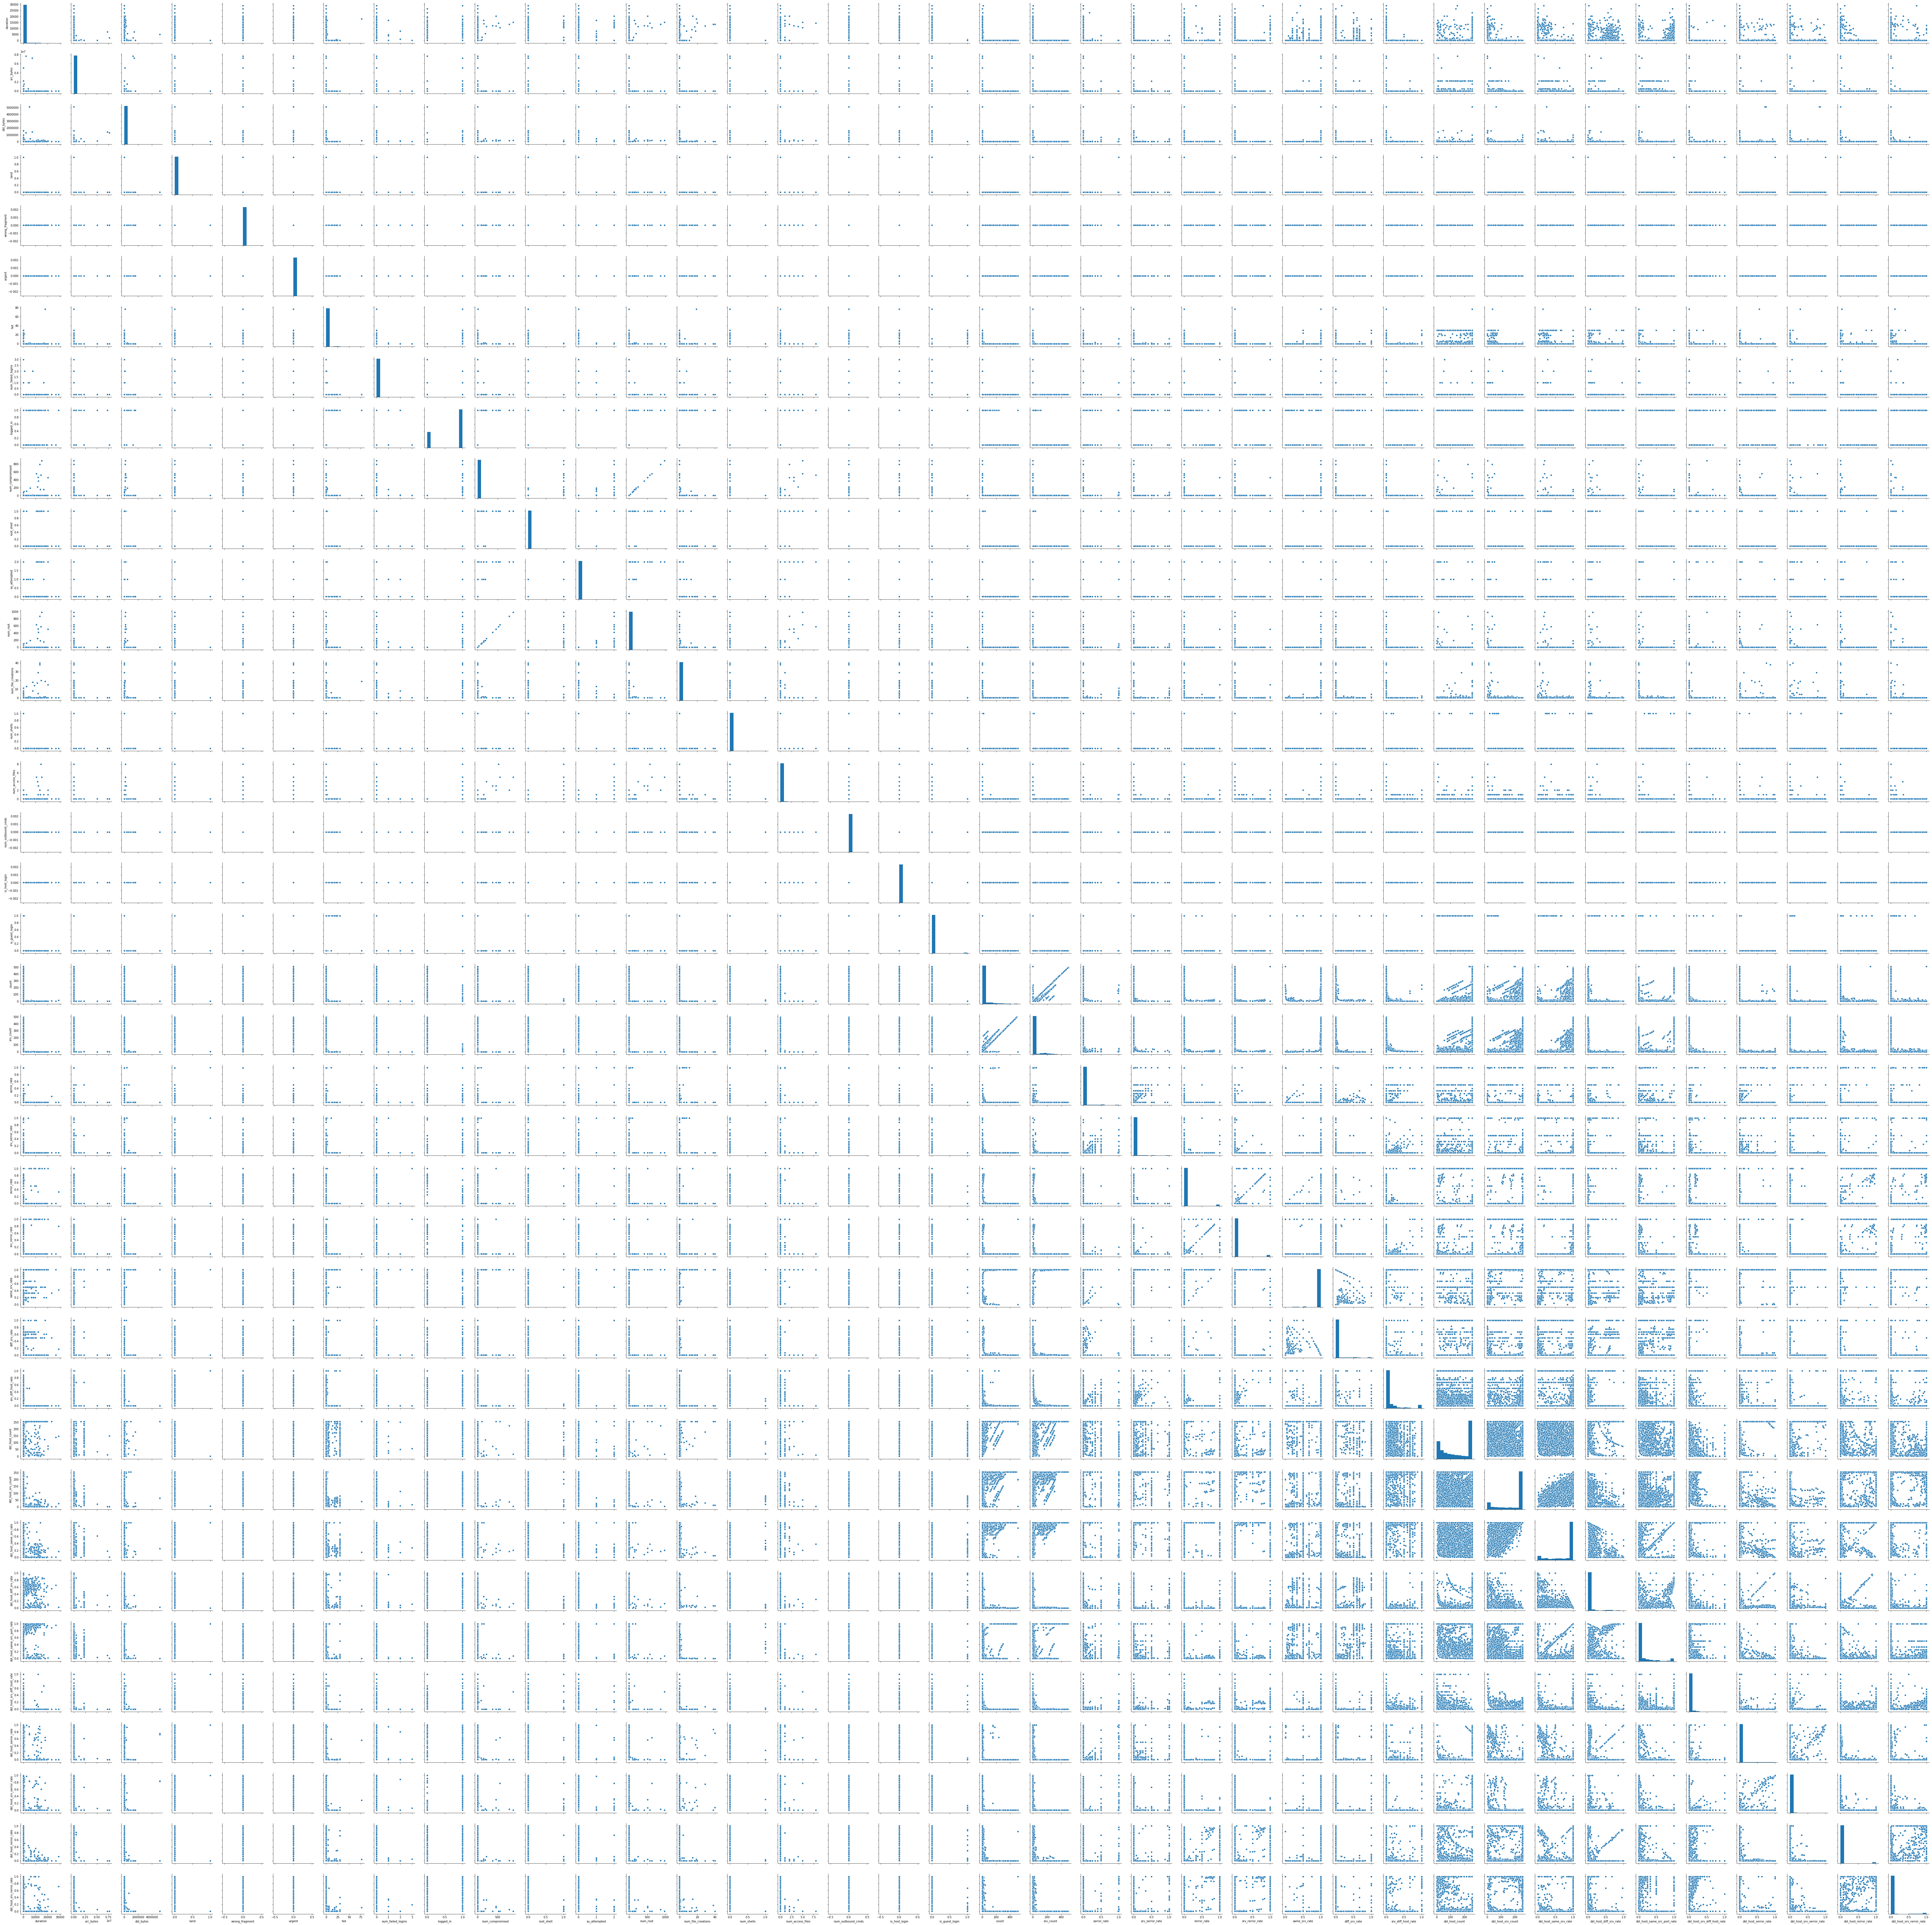

In [162]:
sns.pairplot(data_anomaly)

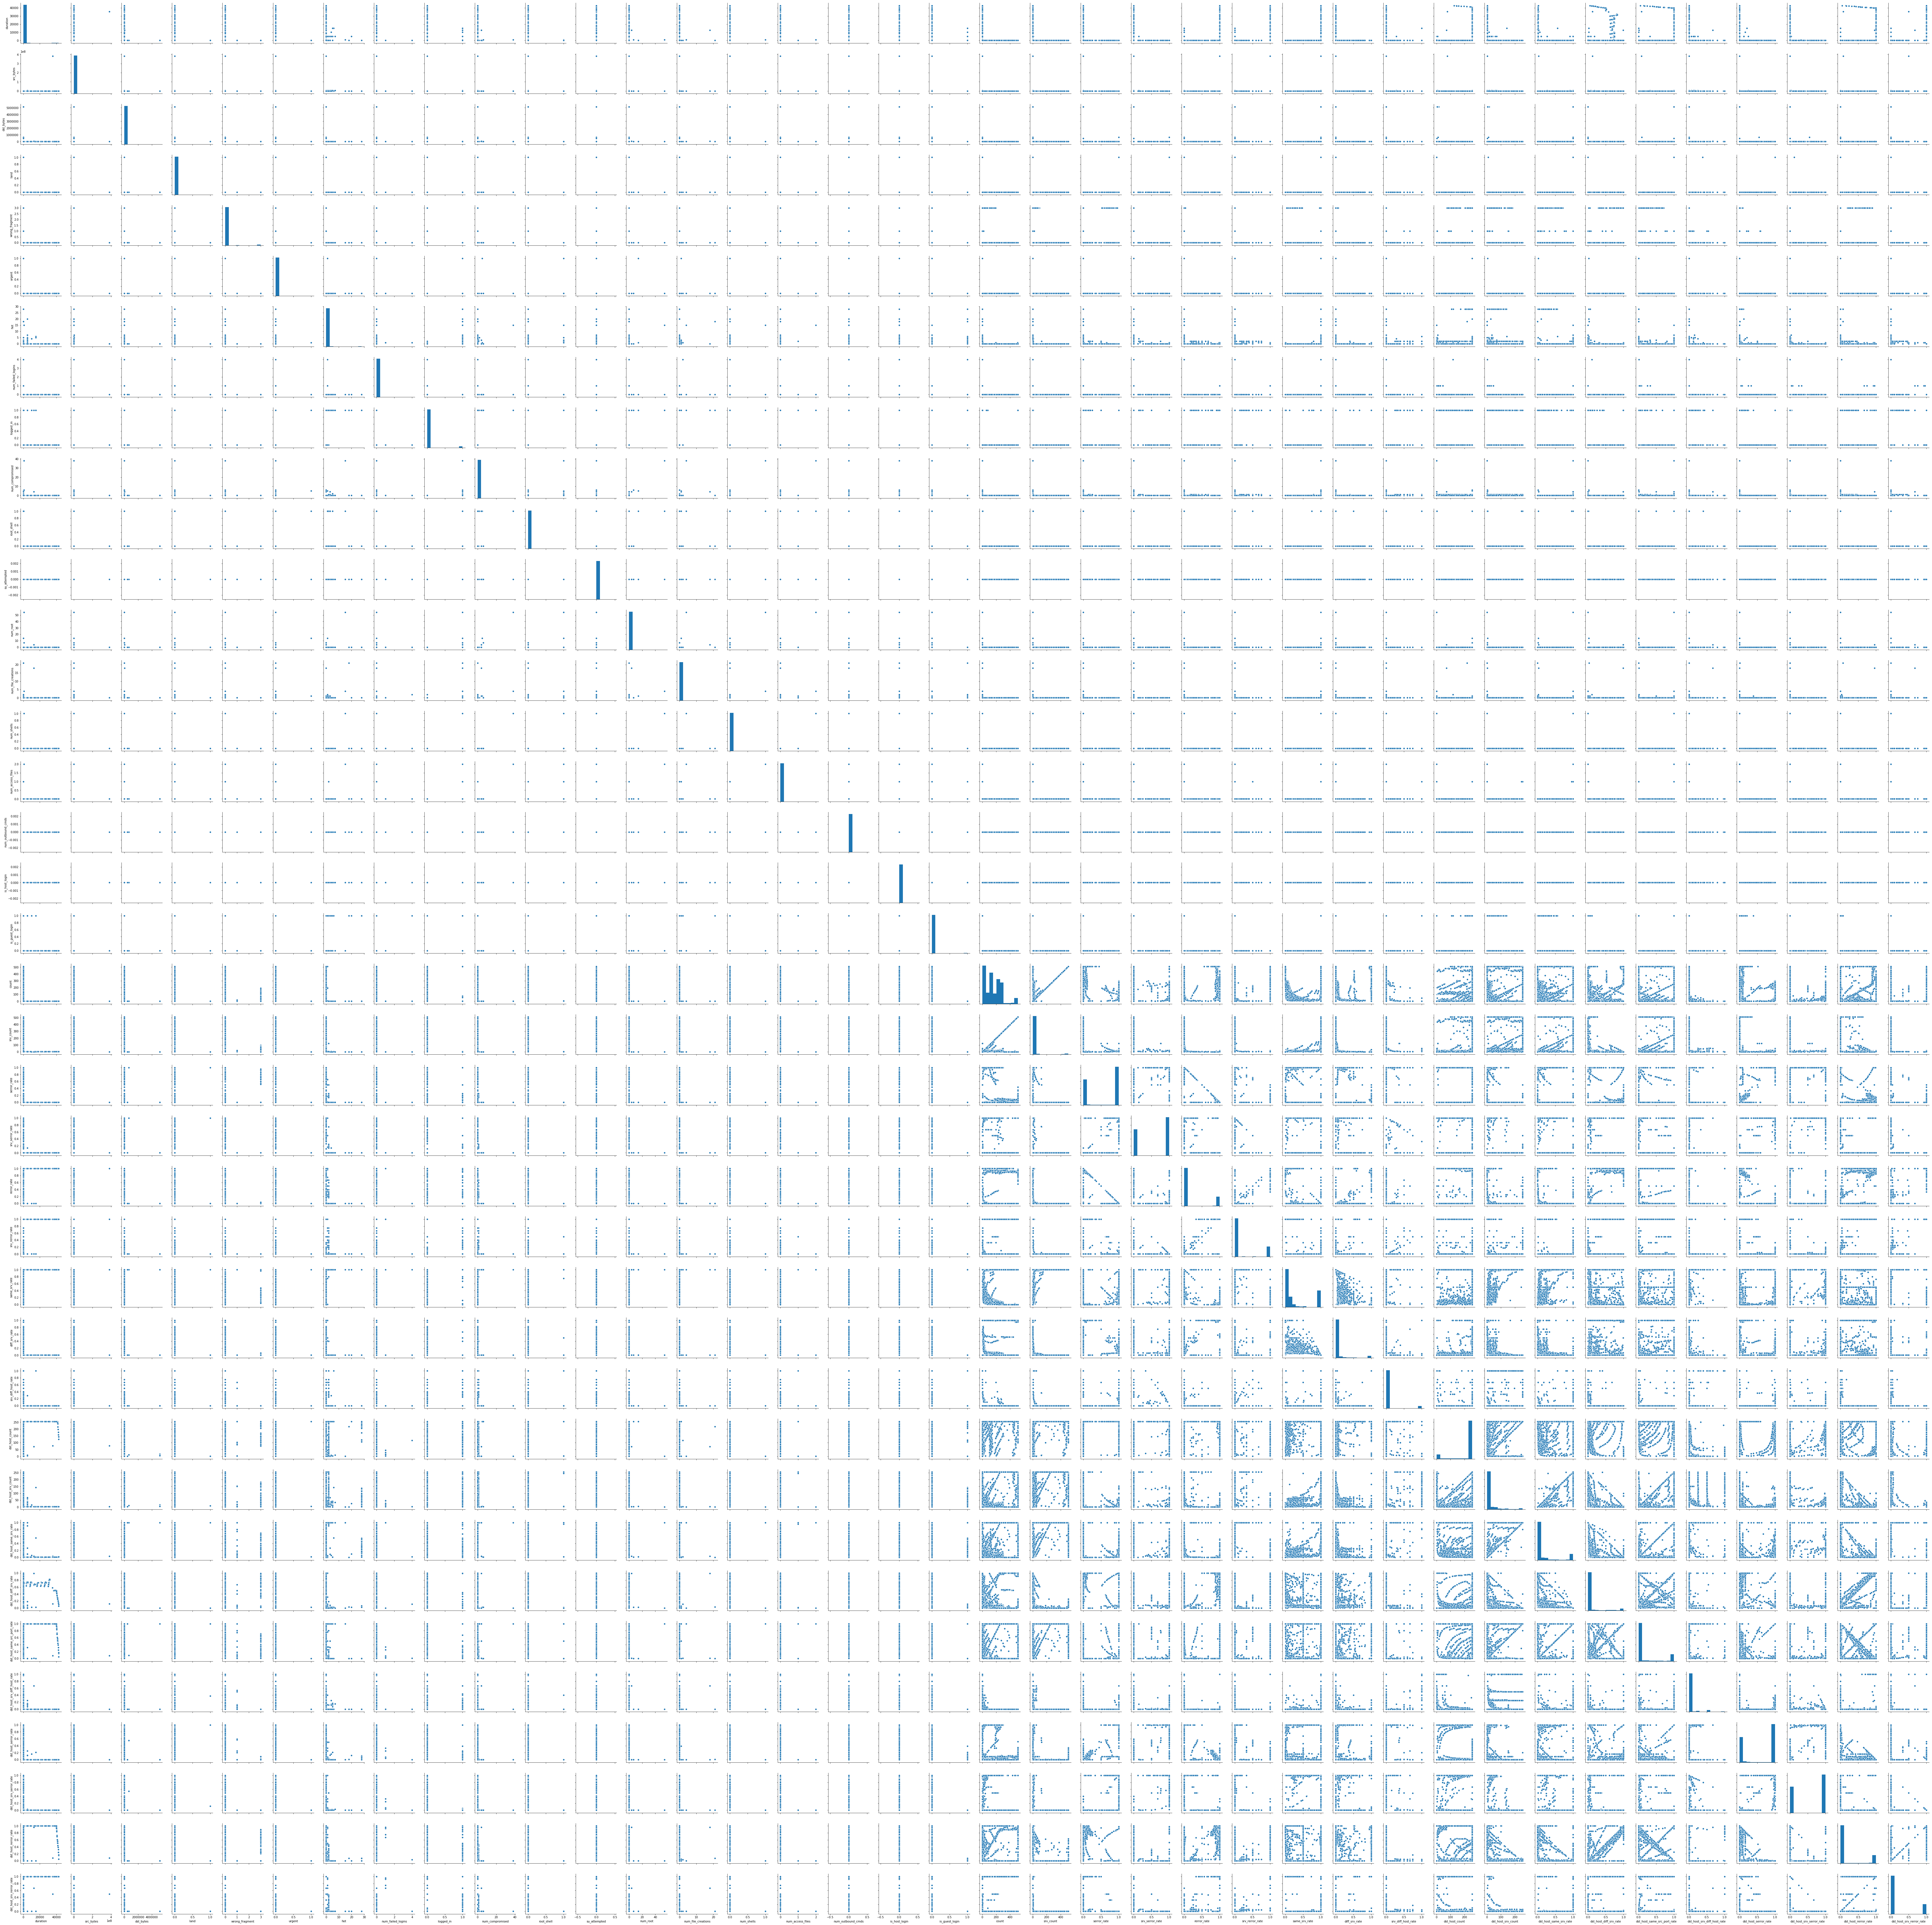

In [163]:
sns.pairplot(data_anomaly1)

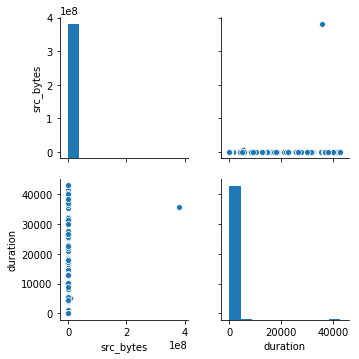

In [167]:
sns.pairplot(data_anomaly1,vars=['src_bytes','duration'])

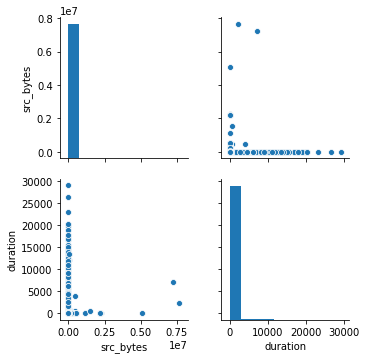

In [168]:
sns.pairplot(data_anomaly,vars=['src_bytes','duration'])

In [10]:
print(train.dst_host_diff_srv_rate.mean())

0.0825385042871


In [15]:
train.iloc[:,:41]

duration protocol_type     service  flag  src_bytes  dst_bytes  land  \
0             0           tcp    ftp_data    SF        491          0     0   
1             0           udp       other    SF        146          0     0   
2             0           tcp     private    S0          0          0     0   
3             0           tcp        http    SF        232       8153     0   
4             0           tcp        http    SF        199        420     0   
5             0           tcp     private   REJ          0          0     0   
6             0           tcp     private    S0          0          0     0   
7             0           tcp     private    S0          0          0     0   
8             0           tcp  remote_job    S0          0          0     0   
9             0           tcp     private    S0          0          0     0   
10            0           tcp     private   REJ          0          0     0   
11            0           tcp     private    S0          0          0     0   
12            0           tcp        http    SF        287       2251     0   
13            0           tcp    ftp_data    SF        334          0     0   
14            0           tcp        name    S0          0          0     0   
15            0           tcp  netbios_ns    S0          0          0     0   
16            0           tcp        http    SF        300      13788     0   
17            0          icmp       eco_i    SF         18          0     0   
18            0           tcp        http    SF        233        616     0   
19            0           tcp        http    SF        343       1178     0   
20            0           tcp         mtp    S0          0          0     0   
21            0           tcp     private    S0          0          0     0   
22            0           tcp        http    SF        253      11905     0   
23         5607           udp       other    SF        147        105     0   
24            0           tcp         mtp    S0          0          0     0   
25          507           tcp      telnet    SF        437      14421     0   
26            0           tcp     private    S0          0          0     0   
27            0           tcp        http    SF        227       6588     0   
28            0           tcp        http    SF        215      10499     0   
29            0           tcp        http    SF        241       1400     0   
...         ...           ...         ...   ...        ...        ...   ...   
25162         0           udp     private    SF        105        147     0   
25163         0           tcp        smtp    S0          0          0     0   
25164         0           tcp        http    SF        276        622     0   
25165         0           tcp        http    SF       2499       2737     0   
25166         0           tcp         ctf   REJ          0          0     0   
25167         0           tcp        http    SF        193       2408     0   
25168         0           tcp        http    SF        252       6160     0   
25169         0           udp     private    SF        105        146     0   
25170         0           tcp        smtp    S0          0          0     0   
25171         0           tcp     private    S0          0          0     0   
25172         0           tcp      telnet    S0          0          0     0   
25173         0           udp    domain_u    SF         39         99     0   
25174         0           tcp         ftp  RSTO          0          0     0   
25175        10           tcp      telnet    SF        139       2257     0   
25176         0           tcp    ftp_data    SF        748          0     0   
25177         0           tcp        http    SF        293       2486     0   
25178         0           tcp     private    S0          0          0     0   
25179         0           tcp     private    S0          0          0     0   
25180         0           tcp       vmnet    S0          